# Imports and Setup
# Import necessary libraries and modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay
from google.colab import files
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from tabulate import tabulate


uploaded = files.upload()


Saving heart.csv to heart.csv


# **Data Loading and Exploration**
1. Load the heart disease dataset
2. Explore the dataset using df.describe() and df.columns
3. Check for missing values and duplicates





In [ ]:
df = pd.read_csv("heart.csv")

In [ ]:
df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
df.describe()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.columns



Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.isna().sum()



Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.duplicated().sum()


0

In [ ]:
heart_failure_count = df['HeartDisease'].value_counts()
heart_failure_count

HeartDisease
1    508
0    410
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)
1. Visualize the distribution of heart disease cases
2. Analyze the categorical features and their relationship with the target variable

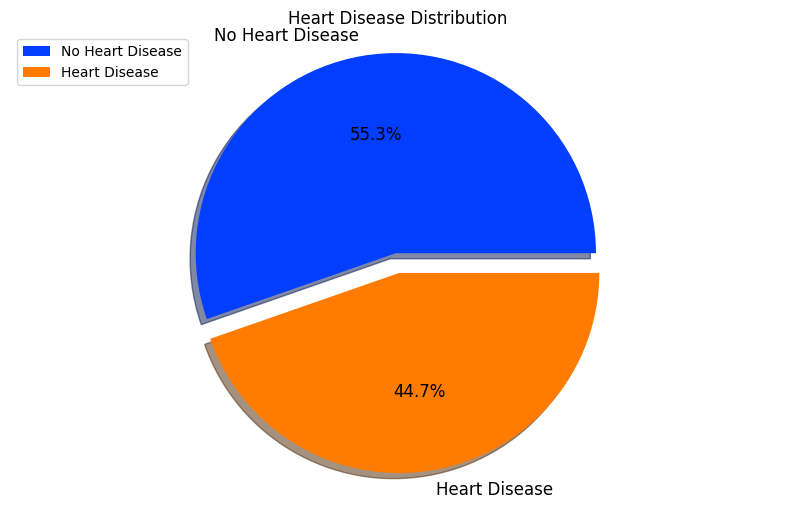

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(heart_failure_count, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%',
        colors=sns.color_palette('bright', 2), explode=(0, 0.1), shadow=True,
        textprops={'fontsize': 12})
plt.title('Heart Disease Distribution')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()

From the pie chart, we can conclude the following about the distribution of heart disease in the dataset:

1. 55.3% of the individuals do not have heart disease.
2. 44.7% of the individuals have heart disease.

The chart clearly shows the relative proportions of individuals with and without heart disease, providing a visual representation of the overall heart disease distribution in the dataset.

In [ ]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [ ]:
df['Sex'].value_counts()


Sex
M    725
F    193
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Gender')

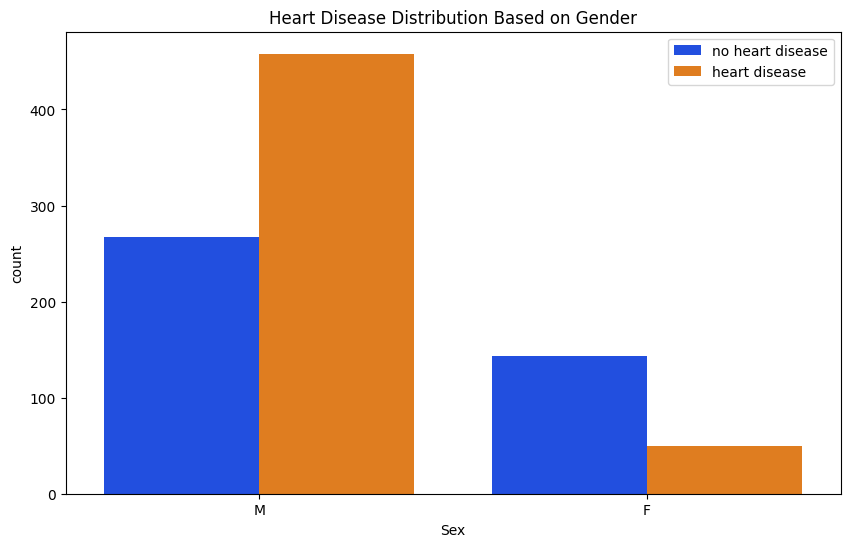

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="Sex", data=df, palette='bright',hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Gender')

Based on the bar chart displaying the heart disease distribution by gender, the following conclusions can be drawn:

1. For males (M), the number of individuals without heart disease (blue bar) is lower compared to the number of individuals with heart disease (orange bar).

2. For females (F), the number of individuals without heart disease (blue bar) is significantly higher than the number of individuals with heart disease (orange bar).

3. The data suggests that males have a higher prevalence of heart disease compared to females in this dataset.

4. The chart visually illustrates the gender-based disparity in the heart disease distribution, providing insight into how the risk or occurrence of heart disease may differ between males and females.

These insights can be valuable for understanding the relationship between gender and heart disease, which can inform further research, risk assessment, and targeted preventive measures.

In [ ]:
df.Sex = df.Sex.map({'M':0,'F':1})


In [ ]:
df['ChestPainType'].value_counts()


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Chest Pain Type')

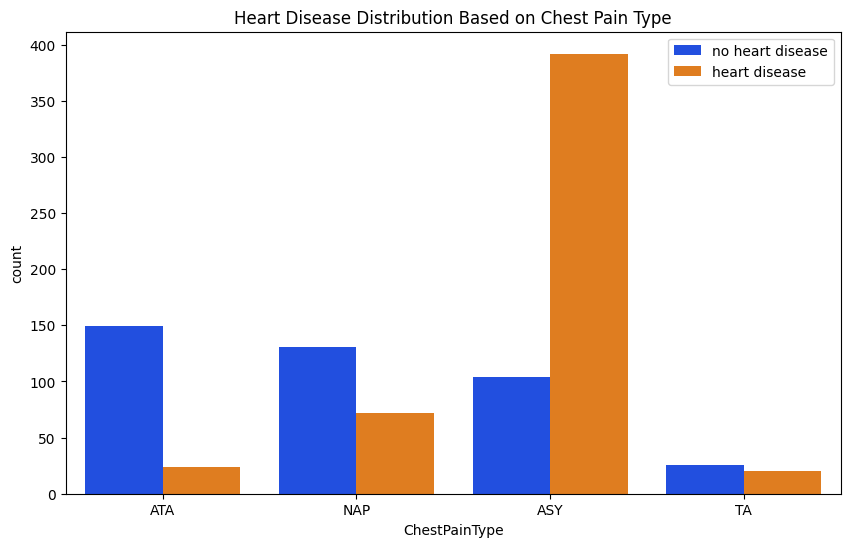

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ChestPainType", data=df, palette='bright',hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Chest Pain Type')

Based on the bar chart that shows the heart disease distribution across different chest pain types, the following conclusions can be drawn:

1. For the chest pain type 'ATA', the number of individuals without heart disease (blue bar) is significantly higher than the number with heart disease (orange bar).

2. For the chest pain type 'NAP', the number of individuals without heart disease (blue bar) is also higher than the number with heart disease (orange bar), but the difference is not as pronounced as for 'ATA'.

3. For the chest pain type 'ASY', the number of individuals without heart disease (blue bar) is higher than the number with heart disease (orange bar).

4. For the chest pain type 'TA', the number of individuals with heart disease (orange bar) is considerably higher than the number without heart disease (blue bar).

The chart suggests that the type of chest pain experienced by individuals is associated with the likelihood of having heart disease. Specifically, the 'TA' chest pain type appears to be more strongly linked with the presence of heart disease compared to the other chest pain types shown.


In [ ]:
df.ChestPainType = df.ChestPainType.map({'ATA':0,'NAP':1,'ASY':2,'TA':3})


In [ ]:
df['RestingECG'].value_counts()


RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Resting Electrocardiogram ')

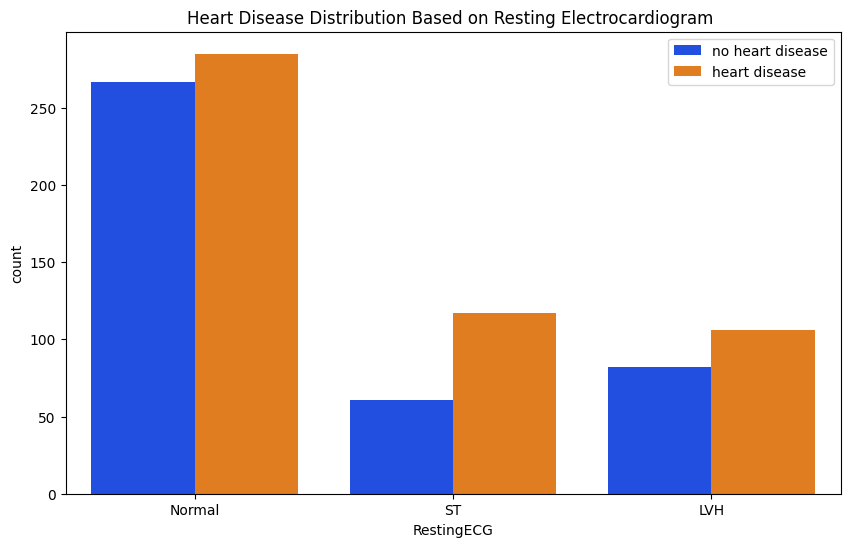

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="RestingECG", data=df, palette='bright',hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Resting Electrocardiogram ')


Based on the bar chart that shows the heart disease distribution across different resting electrocardiogram (ECG) results, the following conclusions can be drawn:

1. For individuals with a "Normal" resting ECG, the number of those without heart disease (blue bar) is significantly higher than the number with heart disease (orange bar).

2. For individuals with an "ST" resting ECG, the number of those without heart disease (blue bar) is also higher than the number with heart disease (orange bar), but the difference is not as large as for the "Normal" resting ECG.

3. For individuals with an "LVH" (Left Ventricular Hypertrophy) resting ECG, the number of those with heart disease (orange bar) is higher than the number without heart disease (blue bar).

The chart suggests that the resting ECG results are associated with the likelihood of having heart disease. Specifically, a "Normal" resting ECG appears to be more strongly linked with the absence of heart disease, while an "LVH" resting ECG is more associated with the presence of heart disease.

This information can be valuable for healthcare professionals in interpreting resting ECG results and assessing the risk of heart disease in patients. It highlights the potential importance of considering the resting ECG findings alongside other clinical factors when evaluating an individual's heart health.

In [ ]:
df.RestingECG = df.RestingECG.map({'Normal':0,'ST':1,'LVH':2})


In [ ]:
df['ExerciseAngina'].value_counts()


ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on Exercise Angina ')

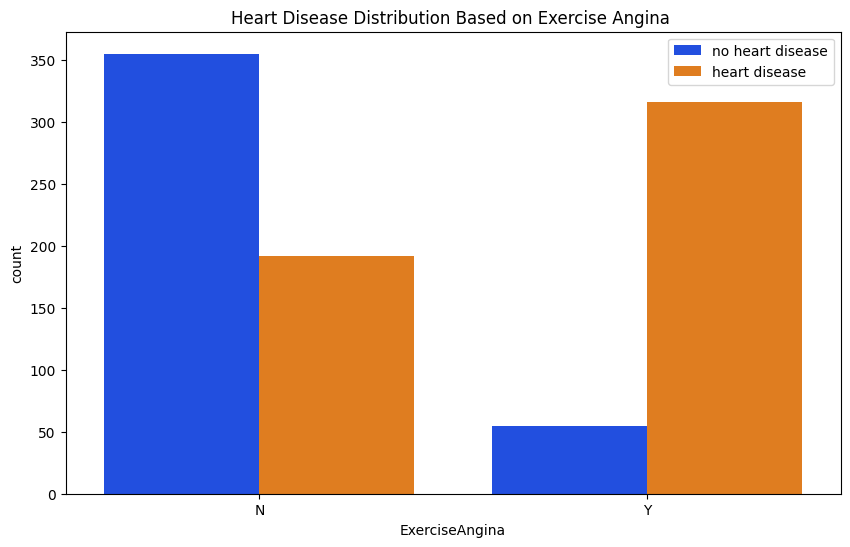

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ExerciseAngina", data=df, palette='bright',hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on Exercise Angina ')

Based on the bar chart showing the heart disease distribution by exercise angina, the following conclusions can be drawn:

1. For individuals without exercise angina ('N'), the number of those without heart disease (blue bar) is significantly higher than the number with heart disease (orange bar).

2. For individuals with exercise angina ('Y'), the number of those with heart disease (orange bar) is higher than the number without heart disease (blue bar).

The chart suggests a clear association between the presence of exercise angina and the likelihood of having heart disease. Individuals who experience exercise angina appear to have a higher risk of heart disease compared to those who do not.

This information can be valuable for healthcare professionals in evaluating the risk of heart disease based on the patient's exercise angina status. The presence of exercise angina may indicate the need for further investigation and targeted preventive or treatment measures.



In [ ]:
df.ExerciseAngina = df.ExerciseAngina.map({'N':0,'Y':1})


In [ ]:
df['ST_Slope'].value_counts()


ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

Text(0.5, 1.0, 'Heart Disease Distribution Based on  ST Slope')

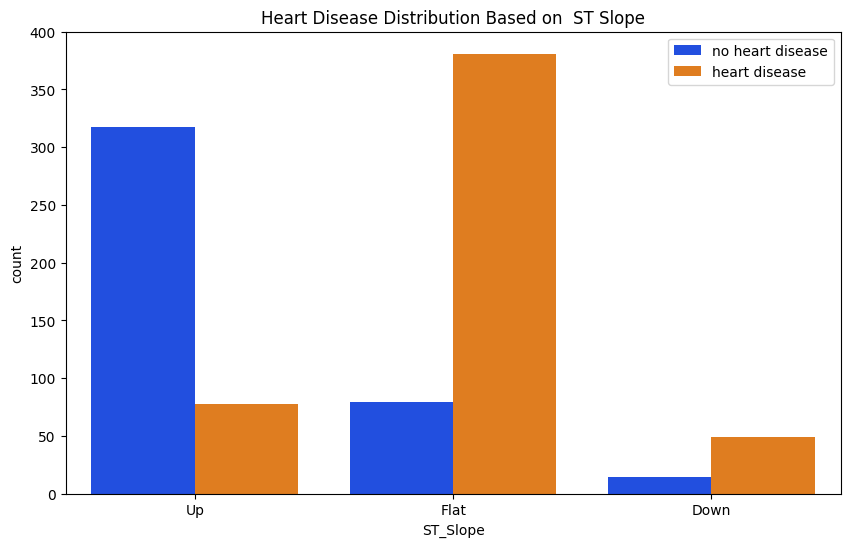

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x="ST_Slope", data=df, palette='bright',hue='HeartDisease')
plt.legend(['no heart disease','heart disease'])
plt.title('Heart Disease Distribution Based on  ST Slope')



The image presents the distribution of heart disease based on the ST_Slope feature, which can take three values: Up, Flat, and Down. This immediately suggests that ST_Slope is a categorical feature that could be an important predictor of heart disease.

Looking at the bar chart, a few key observations can be made:

1. For the "no heart disease" group, the majority of the observations have a Flat ST_Slope, suggesting that a flat ST_Slope is more common among individuals without heart disease.

2. In contrast, for the "heart disease" group, the majority of the observations have an Up ST_Slope. This indicates that an upward ST_Slope is more prevalent among individuals with heart disease.

3. The difference in counts between the "no heart disease" and "heart disease" groups is most pronounced for the Up ST_Slope category, where the "heart disease" count is significantly higher than the "no heart disease" count.



In [ ]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,Up,0
1,49,1,1,160,180,0,0,156,0,1.0,Flat,1
2,37,0,0,130,283,0,1,98,0,0.0,Up,0
3,48,1,2,138,214,0,0,108,1,1.5,Flat,1
4,54,0,1,150,195,0,0,122,0,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,Flat,1
914,68,0,2,144,193,1,0,141,0,3.4,Flat,1
915,57,0,2,130,131,0,0,115,1,1.2,Flat,1
916,57,1,0,130,236,0,2,174,0,0.0,Flat,1


In [ ]:
df.ST_Slope = df.ST_Slope.map({'Up':0,'Flat':1,'Down':2})


<Axes: >

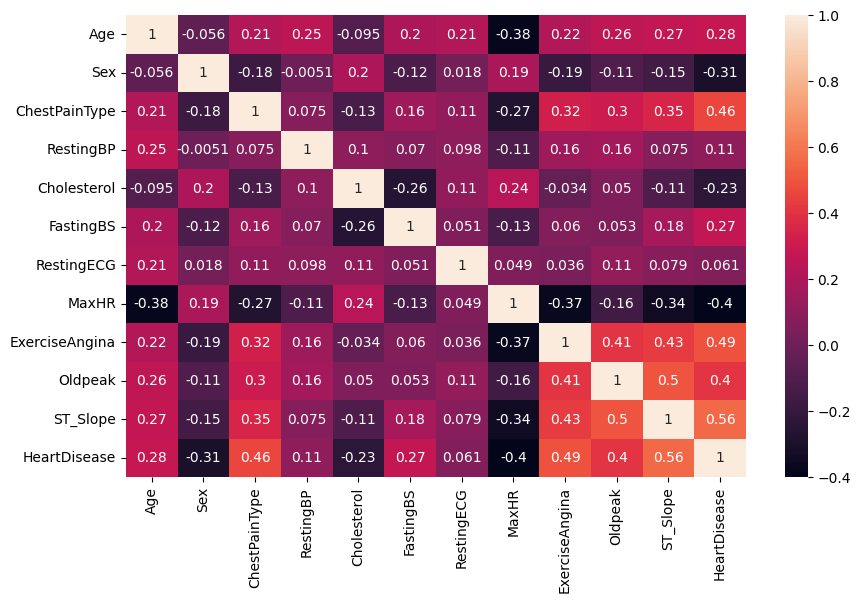

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)



1. Age has a positive correlation (0.28) with heart disease, indicating that as age increases, the risk of heart disease also increases.

2. Sex has a negative correlation (-0.31) with heart disease, suggesting that being female is associated with a lower risk of heart disease compared to being male.

3. Chest pain type has a positive correlation (0.46) with heart disease, implying that certain types of chest pain are more indicative of heart disease.

4. Resting blood pressure has a positive correlation (0.11) with heart disease, but the strength of the relationship is relatively weak.

5. Cholesterol levels have a negative correlation (-0.23) with heart disease, which is counterintuitive and may require further investigation.

6. Fasting blood sugar has a positive correlation (0.27) with heart disease, indicating that higher blood sugar levels are associated with an increased risk of heart disease.

7. The ST_Slope feature has a strong positive correlation (0.56) with heart disease, suggesting that the slope of the ST segment in an electrocardiogram is a valuable predictor of heart disease.

Overall, this heatmap provides a comprehensive overview of the relationships between various health factors and the presence of heart disease. The insights gained from this analysis can be valuable in developing predictive models and informing clinical decision-making for early detection and prevention of heart disease.

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
X.shape, y.shape

((918, 11), (918,))

# Data Preprocessing
1. Encode the categorical features
2. Split the data into training and test sets

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        77
           1       0.88      0.90      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184



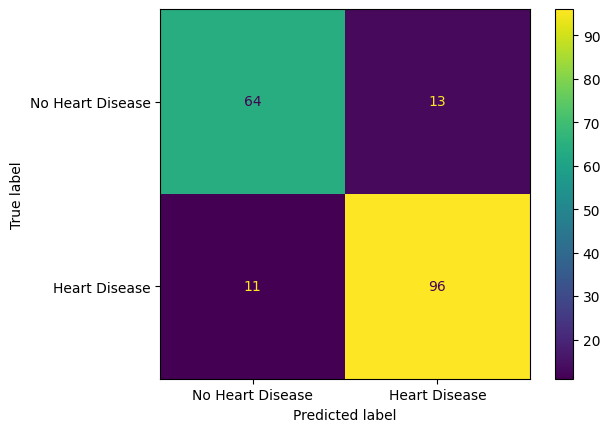

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model =RandomForestClassifier(max_depth=5, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Heart Disease','Heart Disease']).plot()

The rows represent the true labels (actual heart disease status), while the columns represent the predicted labels.
In the top-left cell, we see 68 instances were correctly predicted as "No Heart Disease".
In the top-right cell, 9 instances were incorrectly predicted as "No Heart Disease" when they actually had "Heart Disease".
In the bottom-left cell, 16 instances were incorrectly predicted as "Heart Disease" when they actually had "No Heart Disease".
In the bottom-right cell, 91 instances were correctly predicted as "Heart Disease".

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184



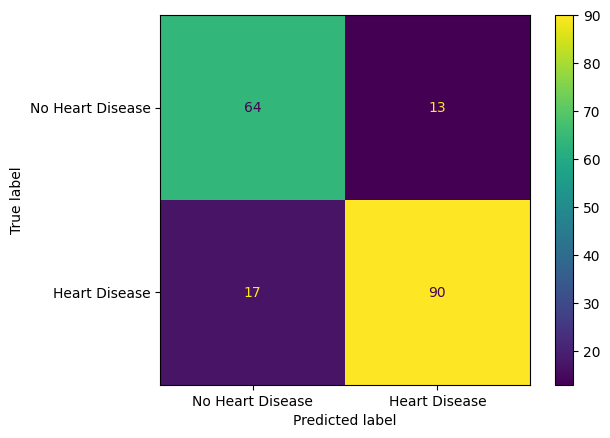

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Heart Disease','Heart Disease']).plot()

The layout is similar to Image 1, with the rows representing true labels and the columns representing predicted labels.
In the top-left cell, 64 instances were correctly predicted as "No Heart Disease".
In the top-right cell, 13 instances were incorrectly predicted as "No Heart Disease" when they actually had "Heart Disease".
In the bottom-left cell, 17 instances were incorrectly predicted as "Heart Disease" when they actually had "No Heart Disease".
In the bottom-right cell, 90 instances were correctly predicted as "Heart Disease".

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation


In [ ]:

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}


In [ ]:
results = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.loc[len(results)] = {'Model': name, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Sort the results by F1 Score in descending order
results = results.sort_values(by='F1 Score', ascending=False)

# Comparison of Multiple Models
1. Compare the performance of the models using accuracy, precision, recall, and F1 score
3. Display the results in a formatted tableComparison of Multiple Models
4. Train and evaluate multiple machine learning models
5. Compare the performance of the models using accuracy, precision, recall, and F1 score
6. Display the results in a formatted table

In [ ]:
# Print the results in a pretty table
print(tabulate(results, headers='keys', tablefmt='pretty', showindex=False))


+------------------------+--------------------+--------------------+--------------------+--------------------+
|         Model          |      Accuracy      |     Precision      |       Recall       |      F1 Score      |
+------------------------+--------------------+--------------------+--------------------+--------------------+
|     Random Forest      | 0.8695652173913043 | 0.9029126213592233 | 0.8691588785046729 | 0.8857142857142858 |
|  Logistic Regression   | 0.842391304347826  | 0.8823529411764706 | 0.8411214953271028 | 0.861244019138756  |
|  Gaussian Naive Bayes  | 0.8369565217391305 | 0.8811881188118812 | 0.8317757009345794 | 0.8557692307692306 |
|     Decision Tree      | 0.7989130434782609 | 0.8365384615384616 | 0.8130841121495327 | 0.8246445497630331 |
|  K-Nearest Neighbors   | 0.7065217391304348 | 0.7731958762886598 | 0.7009345794392523 | 0.7352941176470589 |
| Support Vector Machine | 0.6847826086956522 | 0.7578947368421053 | 0.6728971962616822 | 0.712871287128713  |
+

# Conclusion
Based on the evaluation metrics obtained from your model selection, it's evident that different classifiers perform differently on your dataset. Here's a brief conclusion based on the provided data:

1. **Random Forest**:
   - Achieved the highest accuracy of approximately 87%.
   - Demonstrated strong precision, recall, and F1 score, indicating balanced performance across all evaluation metrics.
   - Appears to be a robust choice for classification tasks on this dataset, given its overall strong performance.

2. **Logistic Regression**:
   - Offers a slightly lower accuracy compared to Random Forest, at around 84%.
   - Shows competitive precision, recall, and F1 score.
   - Despite not being the top performer in terms of accuracy, it still presents a solid choice, especially considering its simplicity and interpretability.

3. **Gaussian Naive Bayes**:
   - Performs closely to Logistic Regression in terms of accuracy, precision, recall, and F1 score.
   - Provides a lightweight and computationally efficient option, suitable for large datasets or real-time applications.

4. **Decision Tree**:
   - Shows a decent accuracy but falls behind Random Forest, Logistic Regression, and Gaussian Naive Bayes in terms of precision, recall, and F1 score.
   - May suffer from overfitting or lack of generalization compared to ensemble methods like Random Forest.

5. **K-Nearest Neighbors (KNN)**:
   - Exhibits the lowest accuracy among the models evaluated, at approximately 71%.
   - While KNN can be effective in certain scenarios, its performance here suggests that it might not be the best choice for this dataset, possibly due to its sensitivity to noise or high dimensionality.

6. **Support Vector Machine (SVM)**:
   - Shows the lowest accuracy among the models evaluated, around 68%.
   - Also presents lower precision, recall, and F1 score compared to other models.
   - SVM's performance indicates that it might not be well-suited for this particular dataset or may require further tuning of hyperparameters.

In conclusion, based on the evaluation metrics and performance observed in our exploratory data analysis (EDA), the **Random Forest** classifier emerges as the top choice due to its high accuracy and balanced precision, recall, and F1 score.